In [1]:
import pandas as pd

column_names = ["exam1", "exam2", "admitted"]
data_admission = pd.read_csv("ex2data1.txt", sep=',',names=column_names, header=None)
print(data_admission.head())


       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


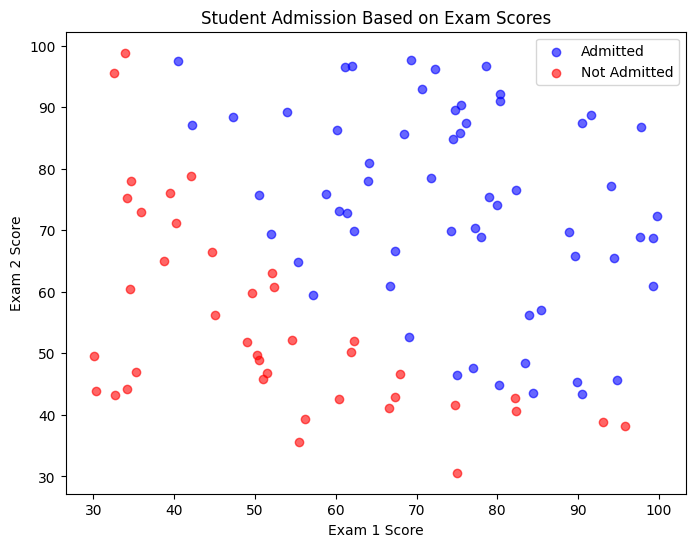

In [2]:
import matplotlib.pyplot as plt

 # Visualize data with  a scatter plot
plt.figure(figsize=(8, 6))

# Students admitted (y = 1)
admitted = data_admission[data_admission['admitted'] == 1]
plt.scatter(admitted['exam1'], admitted['exam2'], color='blue', label='Admitted', alpha=0.6)

# Students non-admitted (y = 0)
not_admitted = data_admission[data_admission['admitted'] == 0]
plt.scatter(not_admitted['exam1'], not_admitted['exam2'], color='red', label='Not Admitted', alpha=0.6)

#  Add  labels and title
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Student Admission Based on Exam Scores")
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = data_admission[["exam1", "exam2"]]
y = data_admission["admitted"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)


In [6]:
# Precision , accuracy computation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Show the classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20




For diabetics case:

The model is good enough , with an accuracy of 80% and an F1-score of 82%, which shows a good balance.
High precision (90%)  → Few false positives.
 Recall (75%)  → It still misses 25% of true positive cases.

 For non-diabetics case:
The model is good enough , with an accuracy of 80% and an F1-score of 78%, which shows a good balance.

Precision:70%:Lower precision compared to the diabetic case: No negligible false negative cases
 Recall (88%)  → It still misses 12% of true negative cases.

